# Statistical Fun on Swimming Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math as math
import seaborn as sb

## Regressions

I will be creating some regressions here to see how the time has changed for different events. I will also be grouping by distances/strokes/"A vs B" to see how those are different between one another. I will be running regressions using various different start and endpoints to see if swimmeres are getting faster at a slower, constant, or faster rate.

My initial hypotheses:

Sprint has improved more than distance.
Breaststroke has improved the most of any stroke...I would guess the order is breaststroke>IM>backstroke>butterfly>freestyle.
B finals have improved faster than A finals. (I believe the gap for what it takes to qualify for each has gottens smaller.)
Swimmers are getting faster at a faster rate for sprints but getting faster at a slower rate for distance.

Reading in the data, getting rid of whitespaces and the extra column.

In [2]:
swim_data_raw = pd.read_csv("Second Swim Data.csv", skipinitialspace = True)
swim_data_raw.columns = swim_data_raw.columns.str.strip()
swim_data_raw["Stroke"] = swim_data_raw["Stroke"].str.strip()
swim_data_raw["A or B Final"] = swim_data_raw["A or B Final"].str.strip()
swim_data_raw["2020"] = swim_data_raw["2020"].str.strip()
del swim_data_raw[swim_data_raw.columns[-1]]
swim_data_raw

,Event,Stroke,Distance,A or B Final,2005,2006,2007,2008,2009,2010,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,A 500 FR,FR,500,A,257.60,257.33,257.18,256.27,254.67,257.28,...,254.06,253.65,253.97,252.18,252.87,253.72,covid,252.37,251.27,251.81
1,B 500 FR,FR,500,B,259.75,261.01,260.49,259.68,257.09,259.61,...,256.77,256.27,256.79,254.09,254.98,254.47,covid,254.10,253.81,253.59
2,A 200 IM,IM,200,A,105.97,105.53,104.99,105.00,103.56,103.80,...,102.24,102.44,102.15,102.24,102.13,102.26,covid,102.21,100.91,101.52
3,B 200 IM,IM,200,B,106.64,106.54,106.20,106.04,104.29,104.75,...,103.66,103.68,103.63,103.32,102.97,103.05,covid,103.13,102.35,102.33
4,A 50 FR,FR,50,A,19.45,19.44,19.37,19.49,19.09,19.37,...,19.11,19.28,19.18,19.06,19.04,19.05,covid,19.17,18.94,18.87
5,B 50 FR,FR,50,B,19.71,19.62,19.62,19.61,19.35,19.63,...,19.42,19.39,19.48,19.28,19.20,19.20,covid,19.39,19.16,19.04
6,A 400 IM,IM,400,A,228.49,227.70,226.25,226.34,223.46,223.81,...,222.85,221.82,221.42,220.64,219.52,220.78,covid,220.80,219.62,219.09
7,B 400 IM,IM,400,B,231.09,230.42,229.67,229.23,226.12,227.04,...,225.13,224.16,223.20,223.64,221.72,222.77,covid,224.05,221.10,221.67
8,A 100 FL,FL,100,A,47.06,46.78,46.60,46.34,45.69,46.38,...,45.92,45.92,45.66,45.47,45.29,45.31,covid,45.10,44.78,44.65
9,B 100 FL,FL,100,B,47.46,47.29,47.18,46.92,46.36,46.79,...,46.33,46.32,46.16,45.87,45.70,45.64,covid,45.64,45.16,45.24


This is the part where I have to make a decision what to do with 2020 data. I can either ignore it (drop it) before running regressions, or I can set it equal to the average of 2019 and 2021 times. Both have their pros and cons. However, I will decide to set it equal to the average of 2019 and 2021 as this will allow an easier comparison for future tests / coding I will do on the data in different programs.

In [3]:
swim_data_raw["2020"] = (swim_data_raw["2019"] + swim_data_raw["2021"])/2
swim_data_raw["2020"]
swim_data_raw

,Event,Stroke,Distance,A or B Final,2005,2006,2007,2008,2009,2010,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,A 500 FR,FR,500,A,257.60,257.33,257.18,256.27,254.67,257.28,...,254.06,253.65,253.97,252.18,252.87,253.72,253.045,252.37,251.27,251.81
1,B 500 FR,FR,500,B,259.75,261.01,260.49,259.68,257.09,259.61,...,256.77,256.27,256.79,254.09,254.98,254.47,254.285,254.10,253.81,253.59
2,A 200 IM,IM,200,A,105.97,105.53,104.99,105.00,103.56,103.80,...,102.24,102.44,102.15,102.24,102.13,102.26,102.235,102.21,100.91,101.52
3,B 200 IM,IM,200,B,106.64,106.54,106.20,106.04,104.29,104.75,...,103.66,103.68,103.63,103.32,102.97,103.05,103.090,103.13,102.35,102.33
4,A 50 FR,FR,50,A,19.45,19.44,19.37,19.49,19.09,19.37,...,19.11,19.28,19.18,19.06,19.04,19.05,19.110,19.17,18.94,18.87
5,B 50 FR,FR,50,B,19.71,19.62,19.62,19.61,19.35,19.63,...,19.42,19.39,19.48,19.28,19.20,19.20,19.295,19.39,19.16,19.04
6,A 400 IM,IM,400,A,228.49,227.70,226.25,226.34,223.46,223.81,...,222.85,221.82,221.42,220.64,219.52,220.78,220.790,220.80,219.62,219.09
7,B 400 IM,IM,400,B,231.09,230.42,229.67,229.23,226.12,227.04,...,225.13,224.16,223.20,223.64,221.72,222.77,223.410,224.05,221.10,221.67
8,A 100 FL,FL,100,A,47.06,46.78,46.60,46.34,45.69,46.38,...,45.92,45.92,45.66,45.47,45.29,45.31,45.205,45.10,44.78,44.65
9,B 100 FL,FL,100,B,47.46,47.29,47.18,46.92,46.36,46.79,...,46.33,46.32,46.16,45.87,45.70,45.64,45.640,45.64,45.16,45.24


In [4]:
#Getting the non-time columns.
swim_data_describers = swim_data_raw[["Event", "Stroke", "Distance", "A or B Final"]]
swim_data_describers

,Event,Stroke,Distance,A or B Final
0,A 500 FR,FR,500,A
1,B 500 FR,FR,500,B
2,A 200 IM,IM,200,A
3,B 200 IM,IM,200,B
4,A 50 FR,FR,50,A
5,B 50 FR,FR,50,B
6,A 400 IM,IM,400,A
7,B 400 IM,IM,400,B
8,A 100 FL,FL,100,A
9,B 100 FL,FL,100,B


In [5]:
#Get the time columns.
swim_times = swim_data_raw.iloc[:,4:24]
swim_times
fitted_times = swim_times.copy()

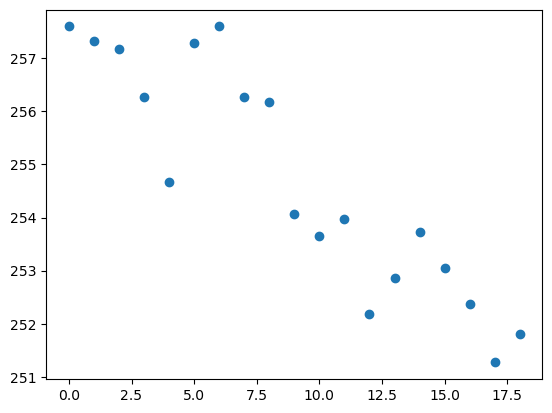

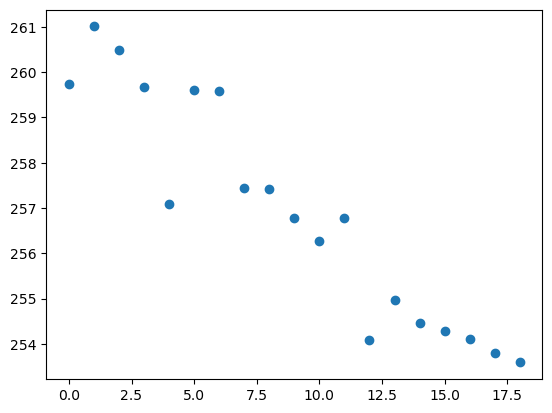

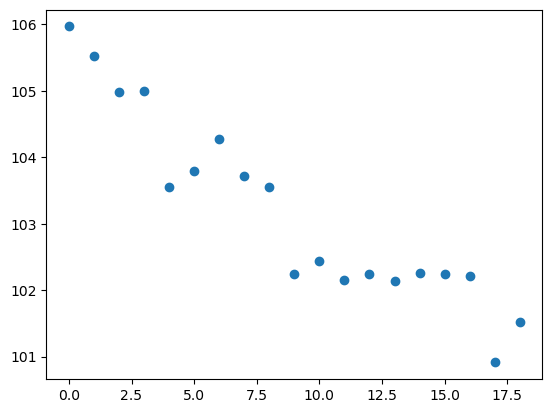

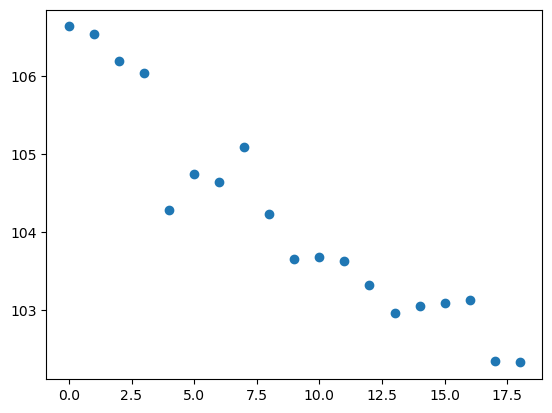

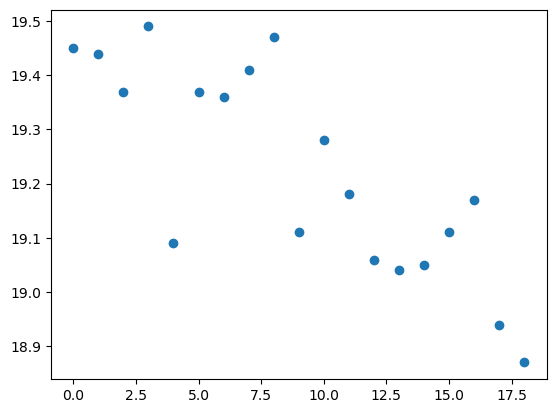

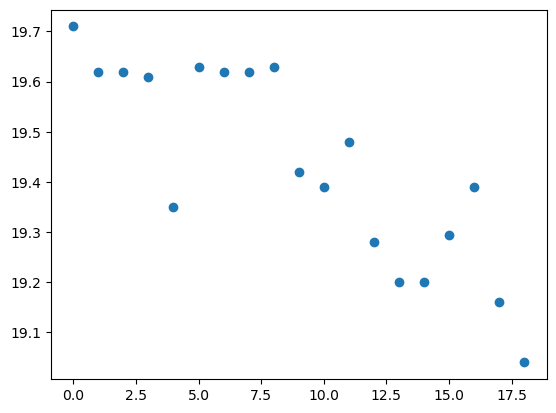

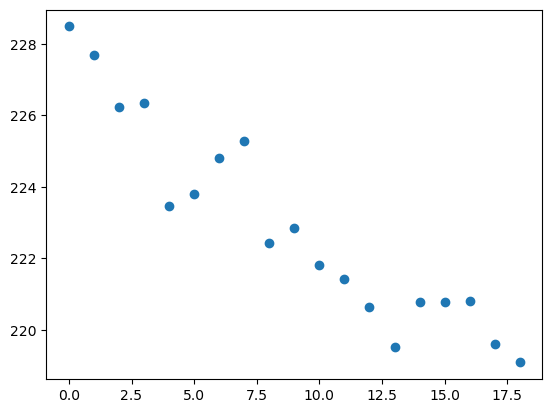

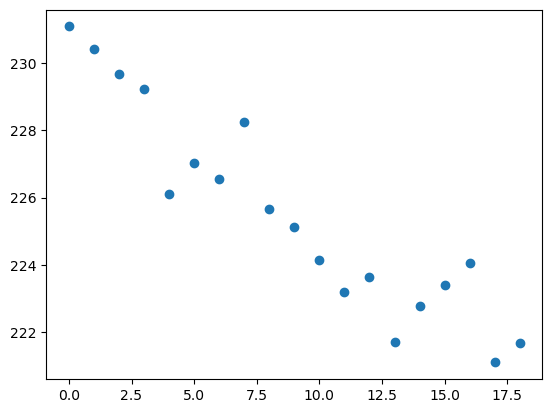

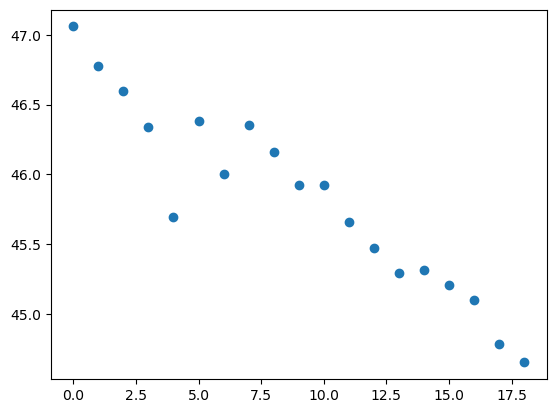

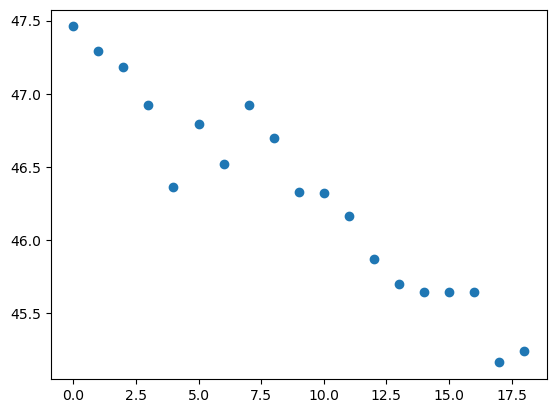

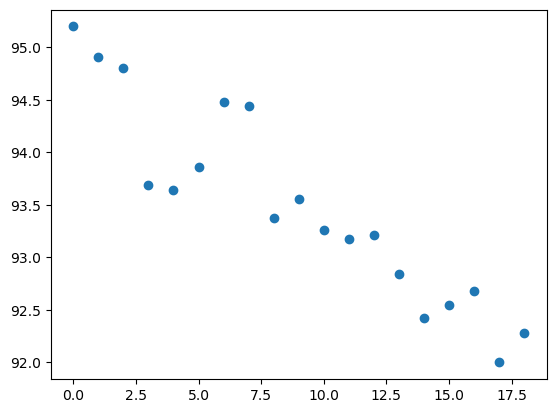

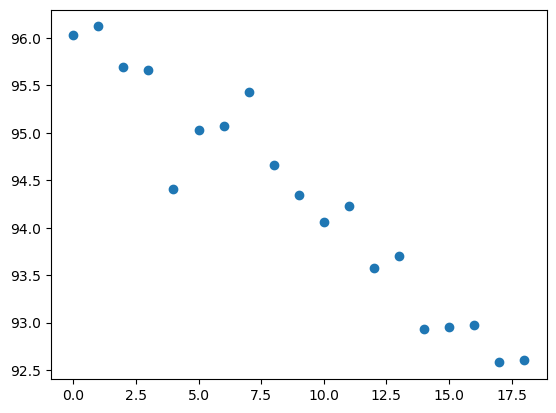

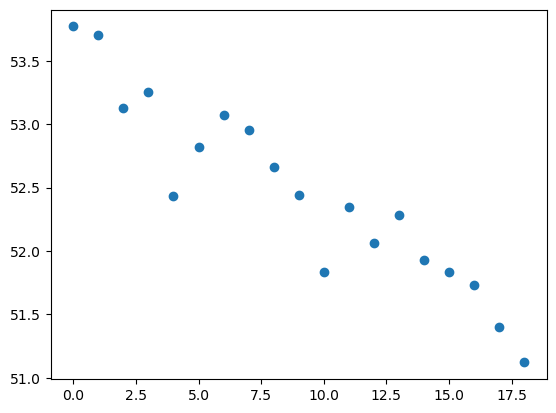

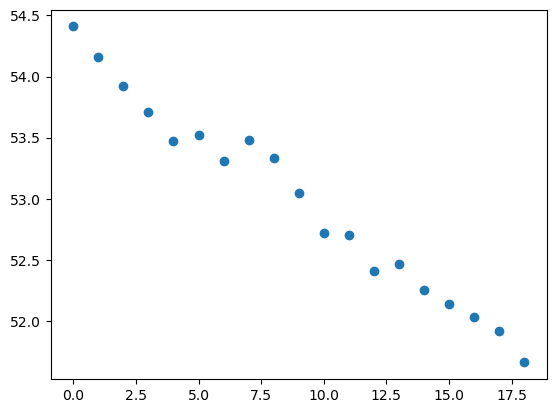

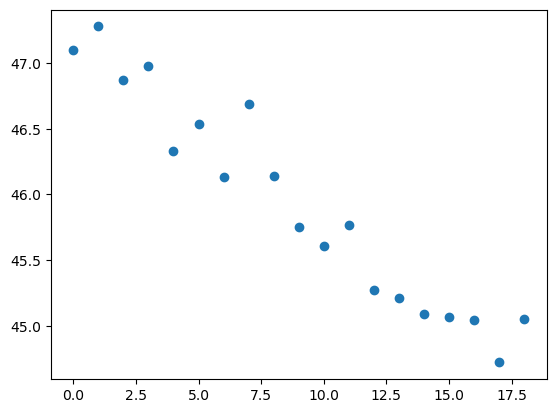

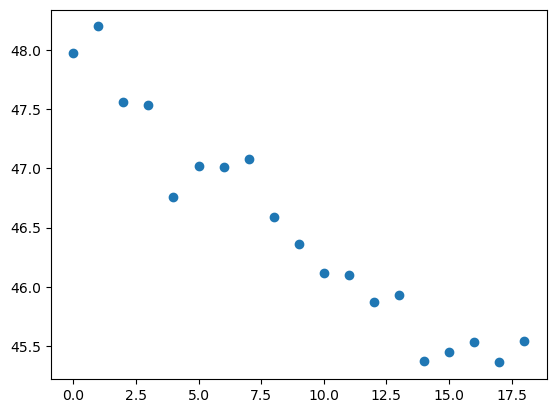

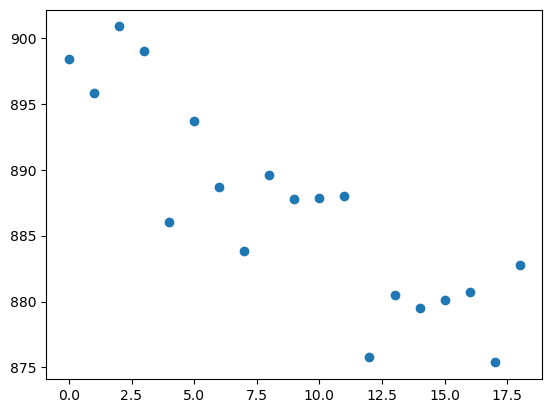

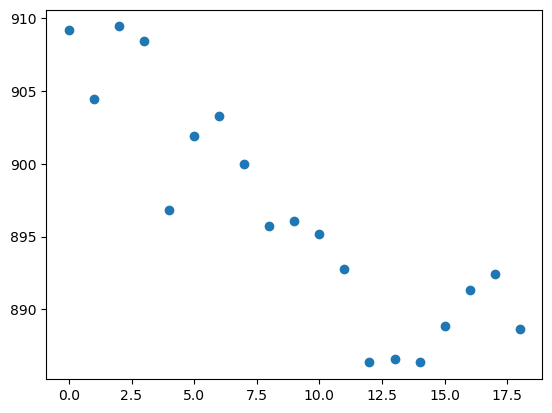

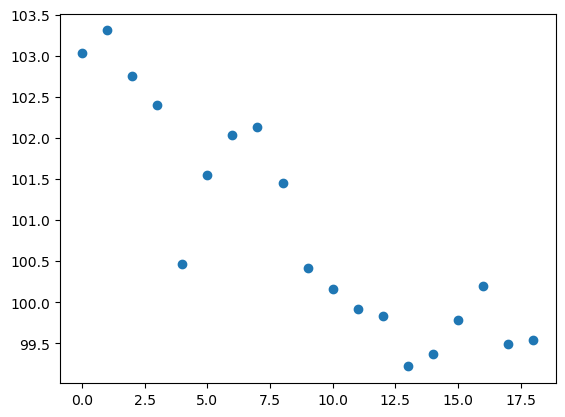

In [6]:
x = np.arange(19)
for i in x:
    plt.scatter(x,swim_times.iloc[i,])
    #fit = np.polyfit(x,np.log(swim_times.iloc[i,], 1))
    plt.show()

In [7]:
#Getting Regressions for Each Individual Event
swim_times = swim_data_raw.iloc[:,4:24]
fitted_times = swim_times.copy()
x = np.arange(len(fitted_times.columns))
regressions = pd.DataFrame(index=np.arange(len(fitted_times)), columns=np.arange(4))
for i in range(len(fitted_times)):
    fit = np.polyfit(x,np.log(swim_times.iloc[i,]),1)
    regressions.iloc[i,1] = fit[1]
    regressions.iloc[i,0] = fit[0]
    regressions.iloc[i,2] = math.exp(fit[0])
    regressions.iloc[i,3] = math.exp(fit[1])
    for j in range(len(fitted_times.columns)):
        fitted_times.iloc[i,j] = math.exp(fit[1] + fit[0]*j)

In [8]:
#Combine with Event Data
events_with_regressions = pd.concat([swim_data_describers,regressions],axis = 1)
events_with_regressions.columns = ["Event", "Stroke", "Distance", "A or B Final", "Log Improvement", "Log Base", "Improvement", "Base"]
events_with_regressions

,Event,Stroke,Distance,A or B Final,Log Improvement,Log Base,Improvement,Base
0,A 500 FR,FR,500,A,-0.001374,5.552421,0.998627,257.861031
1,B 500 FR,FR,500,B,-0.001643,5.563461,0.998358,260.723564
2,A 200 IM,IM,200,A,-0.002317,4.657389,0.997686,105.360662
3,B 200 IM,IM,200,B,-0.002222,4.66615,0.99778,106.287768
4,A 50 FR,FR,50,A,-0.001459,2.96925,0.998542,19.477311
5,B 50 FR,FR,50,B,-0.001557,2.981036,0.998444,19.708222
6,A 400 IM,IM,400,A,-0.002137,5.426071,0.997865,227.254554
7,B 400 IM,IM,400,B,-0.002268,5.438736,0.997735,230.151056
8,A 100 FL,FL,100,A,-0.002469,3.846937,0.997534,46.849366
9,B 100 FL,FL,100,B,-0.00255,3.858148,0.997453,47.377545


In [9]:
# Overall
events_with_regressions.sort_values(by = "Improvement")

,Event,Stroke,Distance,A or B Final,Log Improvement,Log Base,Improvement,Base
15,B 100 BK,BK,100,B,-0.003335,3.869145,0.99667,47.901407
14,A 100 BK,BK,100,A,-0.003042,3.854304,0.996963,47.195774
23,B 200 BR,BR,200,B,-0.002716,4.770344,0.997287,117.959831
13,B 100 BR,BR,100,B,-0.002665,3.993831,0.997338,54.262366
9,B 100 FL,FL,100,B,-0.00255,3.858148,0.997453,47.377545
8,A 100 FL,FL,100,A,-0.002469,3.846937,0.997534,46.849366
25,B 200 FL,FL,200,B,-0.002458,4.663071,0.997545,105.960983
22,A 200 BR,BR,200,A,-0.00245,4.757976,0.997553,116.509904
19,B 200 BK,BK,200,B,-0.00235,4.645782,0.997653,104.144789
12,A 100 BR,BR,100,A,-0.00235,3.981117,0.997653,53.576841


I'm surprised with these results. Some of my hypothesis seem true, but others seem not. It does seem like B final cutoffs improved more than A final cutoffs. But, it's hard to say any of my others held true. Let's run a few more tests

In [10]:
#By Stroke
events_with_regressions.groupby(["Stroke"])["Improvement"].mean().sort_values()

Stroke
BK    0.997290
BR    0.997458
FL    0.997563
IM    0.997767
FR    0.998386
Name: Improvement, dtype: float64

My intial guess was breaststroke>IM>backstroke>butterfly>freestyle. Well, I did get freestyle in the right place, which is what I would have been most confident about. And it does have the largest difference between the others, as the distance between it and IM which was the second least improvement is more than the distance between IM and back, which has the most improvement.

In [11]:
#By Distance
events_with_regressions.groupby(["Distance"])["Improvement"].mean().sort_values()

Distance
100     0.997498
200     0.997732
400     0.997800
500     0.998493
50      0.998493
1650    0.998644
Name: Improvement, dtype: float64

A little hard to discern the results here becasue the 400, 500, 50, and 1650 all only have one event at that distance. However, it does seem like sprint improved more than distance given that 100 improved more than 200. What I could do is group things into larger buckets. I will group >=400 into "long distance", <=100 into sprint, and the remaining into "middle distance".

In [12]:
events_with_regressions["General Distance"] = np.arange(len(events_with_regressions))

In [13]:
for i in np.arange(len(events_with_regressions)):
    if events_with_regressions.loc[i,"Distance"] < 150:
        events_with_regressions.loc[i,"General Distance"] = "Sprint"
    elif events_with_regressions.loc[i,"Distance"] > 350:
        events_with_regressions.loc[i,"General Distance"] = "Long Distance"
    else:
        events_with_regressions.loc[i,"General Distance"] = "Middle Distance"
events_with_regressions

,Event,Stroke,Distance,A or B Final,Log Improvement,Log Base,Improvement,Base,General Distance
0,A 500 FR,FR,500,A,-0.001374,5.552421,0.998627,257.861031,Long Distance
1,B 500 FR,FR,500,B,-0.001643,5.563461,0.998358,260.723564,Long Distance
2,A 200 IM,IM,200,A,-0.002317,4.657389,0.997686,105.360662,Middle Distance
3,B 200 IM,IM,200,B,-0.002222,4.66615,0.99778,106.287768,Middle Distance
4,A 50 FR,FR,50,A,-0.001459,2.96925,0.998542,19.477311,Sprint
5,B 50 FR,FR,50,B,-0.001557,2.981036,0.998444,19.708222,Sprint
6,A 400 IM,IM,400,A,-0.002137,5.426071,0.997865,227.254554,Long Distance
7,B 400 IM,IM,400,B,-0.002268,5.438736,0.997735,230.151056,Long Distance
8,A 100 FL,FL,100,A,-0.002469,3.846937,0.997534,46.849366,Sprint
9,B 100 FL,FL,100,B,-0.00255,3.858148,0.997453,47.377545,Sprint


In [14]:
events_with_regressions.groupby(["General Distance"])["Improvement"].mean().sort_values()

General Distance
Sprint             0.997697
Middle Distance    0.997732
Long Distance      0.998312
Name: Improvement, dtype: float64

Glad I was correct!

In [15]:
#By A or B
events_with_regressions.groupby(["A or B Final"])["Improvement"].mean().sort_values()

A or B Final
B    0.997762
A    0.997943
Name: Improvement, dtype: float64

Glad I was correct!

In [16]:
#Getting events where B final improved by less than A
events_with_regressions["B Faster"] = np.arange(len(events_with_regressions))

In [17]:
#This is kind of cheating, but it works!
x = [0,2,4,6,8,10,12,14,16,18,20,22,24]
for i in x:
    if events_with_regressions.loc[i,"Improvement"] < events_with_regressions.loc[i+1,"Improvement"]:
        events_with_regressions.loc[i,"B Faster"] = "No"
        events_with_regressions.loc[i+1,"B Faster"] = "No"
    else:
        events_with_regressions.loc[i,"B Faster"] = "Yes"
        events_with_regressions.loc[i+1,"B Faster"] = "Yes"
events_with_regressions

,Event,Stroke,Distance,A or B Final,Log Improvement,Log Base,Improvement,Base,General Distance,B Faster
0,A 500 FR,FR,500,A,-0.001374,5.552421,0.998627,257.861031,Long Distance,Yes
1,B 500 FR,FR,500,B,-0.001643,5.563461,0.998358,260.723564,Long Distance,Yes
2,A 200 IM,IM,200,A,-0.002317,4.657389,0.997686,105.360662,Middle Distance,No
3,B 200 IM,IM,200,B,-0.002222,4.66615,0.99778,106.287768,Middle Distance,No
4,A 50 FR,FR,50,A,-0.001459,2.96925,0.998542,19.477311,Sprint,Yes
5,B 50 FR,FR,50,B,-0.001557,2.981036,0.998444,19.708222,Sprint,Yes
6,A 400 IM,IM,400,A,-0.002137,5.426071,0.997865,227.254554,Long Distance,Yes
7,B 400 IM,IM,400,B,-0.002268,5.438736,0.997735,230.151056,Long Distance,Yes
8,A 100 FL,FL,100,A,-0.002469,3.846937,0.997534,46.849366,Sprint,Yes
9,B 100 FL,FL,100,B,-0.00255,3.858148,0.997453,47.377545,Sprint,Yes


Don't need summary statistics to see that this only happened in one event: the 200IM.

I'm going to run regressions with just more recent data, since I've been following swimming more closely. I'll split the data from 2005 to 2014 and 2014 to 2023. (2014 will be in both data sets.) This will allow me to see if my hypotheses were more correct for the recent time, and will also allow me to see if swimmers are getting faster and an increasing or decreasing rate.

In [18]:
#Create new dataframes. Note I'm taking a fun liberty here by calling the later dataframe "future".
swim_data_past = swim_data_raw.iloc[:,0:13]
swim_data_future = swim_data_raw.iloc[:,13:23]
swim_data_future = pd.concat([swim_data_describers,swim_data_future],axis = 1)
swim_data_future

,Event,Stroke,Distance,A or B Final,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,A 500 FR,FR,500,A,254.06,253.65,253.97,252.18,252.87,253.72,253.045,252.37,251.27,251.81
1,B 500 FR,FR,500,B,256.77,256.27,256.79,254.09,254.98,254.47,254.285,254.10,253.81,253.59
2,A 200 IM,IM,200,A,102.24,102.44,102.15,102.24,102.13,102.26,102.235,102.21,100.91,101.52
3,B 200 IM,IM,200,B,103.66,103.68,103.63,103.32,102.97,103.05,103.090,103.13,102.35,102.33
4,A 50 FR,FR,50,A,19.11,19.28,19.18,19.06,19.04,19.05,19.110,19.17,18.94,18.87
5,B 50 FR,FR,50,B,19.42,19.39,19.48,19.28,19.20,19.20,19.295,19.39,19.16,19.04
6,A 400 IM,IM,400,A,222.85,221.82,221.42,220.64,219.52,220.78,220.790,220.80,219.62,219.09
7,B 400 IM,IM,400,B,225.13,224.16,223.20,223.64,221.72,222.77,223.410,224.05,221.10,221.67
8,A 100 FL,FL,100,A,45.92,45.92,45.66,45.47,45.29,45.31,45.205,45.10,44.78,44.65
9,B 100 FL,FL,100,B,46.33,46.32,46.16,45.87,45.70,45.64,45.640,45.64,45.16,45.24


In [19]:
#Getting Regressions for Each Individual Event for Past Data
swim_times_past = swim_data_past.iloc[:,4:13]
fitted_times_past = swim_times_past.copy()
x = np.arange(len(fitted_times_past.columns))
regressions_past = pd.DataFrame(index=np.arange(len(fitted_times_past)), columns=np.arange(4))
for i in range(len(fitted_times_past)):
    fit = np.polyfit(x,np.log(swim_times_past.iloc[i,]),1)
    regressions_past.iloc[i,1] = fit[1]
    regressions_past.iloc[i,0] = fit[0]
    regressions_past.iloc[i,2] = math.exp(fit[0])
    regressions_past.iloc[i,3] = math.exp(fit[1])
    for j in range(len(fitted_times_past.columns)):
        fitted_times_past.iloc[i,j] = math.exp(fit[1] + fit[0]*j)
regressions_past

,0,1,2,3
0,-0.000456,5.549759,0.999545,257.175546
1,-0.001407,5.562911,0.998594,260.58025
2,-0.002826,4.660341,0.997178,105.672069
3,-0.0029,4.669145,0.997104,106.606603
4,-0.000129,2.964912,0.999871,19.392996
5,-0.000254,2.976591,0.999746,19.620825
6,-0.002725,5.428732,0.997279,227.860073
7,-0.002668,5.440986,0.997336,230.669537
8,-0.002167,3.845356,0.997836,46.775355
9,-0.001985,3.856025,0.998017,47.277074


In [20]:
#Getting Regressions for Each Individual Event for Future Data
swim_times_future = swim_data_future.iloc[:,4:13]
fitted_times_future = swim_times_future.copy()
x = np.arange(len(fitted_times_future.columns))
regressions_future = pd.DataFrame(index=np.arange(len(fitted_times_future)), columns=np.arange(4))
for i in range(len(fitted_times_future)):
    fit = np.polyfit(x,np.log(swim_times_future.iloc[i,]),1)
    regressions_future.iloc[i,1] = fit[1]
    regressions_future.iloc[i,0] = fit[0]
    regressions_future.iloc[i,2] = math.exp(fit[0])
    regressions_future.iloc[i,3] = math.exp(fit[1])
    for j in range(len(fitted_times_future.columns)):
        fitted_times_future.iloc[i,j] = math.exp(fit[1] + fit[0]*j)
regressions_future

,0,1,2,3
0,-0.001009,5.53748,0.998991,254.036945
1,-0.0015,5.5475,0.998501,256.595211
2,-0.000954,4.629669,0.999046,102.480118
3,-0.001332,4.642074,0.998669,103.759287
4,-0.001012,2.953959,0.998988,19.181744
5,-0.001286,2.965896,0.998715,19.412082
6,-0.001288,5.402924,0.998713,222.054659
7,-0.001262,5.413293,0.998738,224.369215
8,-0.002969,3.827494,0.997035,45.947233
9,-0.002906,3.836508,0.997098,46.363285


In [21]:
#Combine with Event Data
events_with_regressions_past = pd.concat([swim_data_describers,regressions_past],axis = 1)
events_with_regressions_past.columns = ["Event", "Stroke", "Distance", "A or B Final", "Log Improvement", "Log Base", "Improvement", "Base"]
events_with_regressions_past

,Event,Stroke,Distance,A or B Final,Log Improvement,Log Base,Improvement,Base
0,A 500 FR,FR,500,A,-0.000456,5.549759,0.999545,257.175546
1,B 500 FR,FR,500,B,-0.001407,5.562911,0.998594,260.58025
2,A 200 IM,IM,200,A,-0.002826,4.660341,0.997178,105.672069
3,B 200 IM,IM,200,B,-0.0029,4.669145,0.997104,106.606603
4,A 50 FR,FR,50,A,-0.000129,2.964912,0.999871,19.392996
5,B 50 FR,FR,50,B,-0.000254,2.976591,0.999746,19.620825
6,A 400 IM,IM,400,A,-0.002725,5.428732,0.997279,227.860073
7,B 400 IM,IM,400,B,-0.002668,5.440986,0.997336,230.669537
8,A 100 FL,FL,100,A,-0.002167,3.845356,0.997836,46.775355
9,B 100 FL,FL,100,B,-0.001985,3.856025,0.998017,47.277074


In [22]:
#Combine with Event Data
events_with_regressions_future = pd.concat([swim_data_describers,regressions_future],axis = 1)
events_with_regressions_future.columns = ["Event", "Stroke", "Distance", "A or B Final", "Log Improvement", "Log Base", "Improvement", "Base"]
events_with_regressions_future

,Event,Stroke,Distance,A or B Final,Log Improvement,Log Base,Improvement,Base
0,A 500 FR,FR,500,A,-0.001009,5.53748,0.998991,254.036945
1,B 500 FR,FR,500,B,-0.0015,5.5475,0.998501,256.595211
2,A 200 IM,IM,200,A,-0.000954,4.629669,0.999046,102.480118
3,B 200 IM,IM,200,B,-0.001332,4.642074,0.998669,103.759287
4,A 50 FR,FR,50,A,-0.001012,2.953959,0.998988,19.181744
5,B 50 FR,FR,50,B,-0.001286,2.965896,0.998715,19.412082
6,A 400 IM,IM,400,A,-0.001288,5.402924,0.998713,222.054659
7,B 400 IM,IM,400,B,-0.001262,5.413293,0.998738,224.369215
8,A 100 FL,FL,100,A,-0.002969,3.827494,0.997035,45.947233
9,B 100 FL,FL,100,B,-0.002906,3.836508,0.997098,46.363285


Let's take a look at some of the "future" statistics.

In [23]:
# Overall
events_with_regressions_future.sort_values(by = "Improvement")

,Event,Stroke,Distance,A or B Final,Log Improvement,Log Base,Improvement,Base
8,A 100 FL,FL,100,A,-0.002969,3.827494,0.997035,45.947233
9,B 100 FL,FL,100,B,-0.002906,3.836508,0.997098,46.363285
15,B 100 BK,BK,100,B,-0.002754,3.835002,0.99725,46.293528
14,A 100 BK,BK,100,A,-0.002731,3.823773,0.997273,45.776582
20,A 100 FR,FR,100,A,-0.002598,3.7476,0.997405,42.419139
13,B 100 BR,BR,100,B,-0.002501,3.96908,0.997502,52.935826
11,B 200 FR,FR,200,B,-0.002403,4.547381,0.9976,94.384852
24,A 200 FL,FL,200,A,-0.002389,4.629825,0.997614,102.496093
22,A 200 BR,BR,200,A,-0.00202,4.734347,0.997982,113.789116
12,A 100 BR,BR,100,A,-0.001806,3.958131,0.998195,52.35935


100 back near the top despite a noticeable reversal (i.e., slower times than 2022) in 2023's time to make it back. 100 fly at the top...no surprise given how fast it's been the past few years.

In [24]:
#By Stroke
events_with_regressions_future.groupby(["Stroke"])["Improvement"].mean().sort_values()

Stroke
FL    0.997543
BR    0.998001
BK    0.998347
FR    0.998467
IM    0.998792
Name: Improvement, dtype: float64

Freestyle actaully improved by more than IM. That is very surprising to me. It could be because it has the 50 and 100...I'm still holding out hope that my hypothesis about the 50 seeing huge improvements is true!

In [25]:
#By Distance
events_with_regressions_future.groupby(["Distance"])["Improvement"].mean().sort_values()

Distance
100     0.997528
200     0.998473
400     0.998726
500     0.998746
50      0.998851
1650    0.998900
Name: Improvement, dtype: float64

Well...so much for that hypothesis!
Let's group into more general groups like we did last time.

In [26]:
events_with_regressions_future["General Distance"] = np.arange(len(events_with_regressions_future))

In [27]:
for i in np.arange(len(events_with_regressions_future)):
    if events_with_regressions_future.loc[i,"Distance"] < 150:
        events_with_regressions_future.loc[i,"General Distance"] = "Sprint"
    elif events_with_regressions_future.loc[i,"Distance"] > 350:
        events_with_regressions_future.loc[i,"General Distance"] = "Long Distance"
    else:
        events_with_regressions_future.loc[i,"General Distance"] = "Middle Distance"
events_with_regressions_future

,Event,Stroke,Distance,A or B Final,Log Improvement,Log Base,Improvement,Base,General Distance
0,A 500 FR,FR,500,A,-0.001009,5.53748,0.998991,254.036945,Long Distance
1,B 500 FR,FR,500,B,-0.0015,5.5475,0.998501,256.595211,Long Distance
2,A 200 IM,IM,200,A,-0.000954,4.629669,0.999046,102.480118,Middle Distance
3,B 200 IM,IM,200,B,-0.001332,4.642074,0.998669,103.759287,Middle Distance
4,A 50 FR,FR,50,A,-0.001012,2.953959,0.998988,19.181744,Sprint
5,B 50 FR,FR,50,B,-0.001286,2.965896,0.998715,19.412082,Sprint
6,A 400 IM,IM,400,A,-0.001288,5.402924,0.998713,222.054659,Long Distance
7,B 400 IM,IM,400,B,-0.001262,5.413293,0.998738,224.369215,Long Distance
8,A 100 FL,FL,100,A,-0.002969,3.827494,0.997035,45.947233,Sprint
9,B 100 FL,FL,100,B,-0.002906,3.836508,0.997098,46.363285,Sprint


In [28]:
#By General Distance
events_with_regressions_future.groupby(["General Distance"])["Improvement"].mean().sort_values()

General Distance
Sprint             0.997793
Middle Distance    0.998473
Long Distance      0.998790
Name: Improvement, dtype: float64

The Sprints have improved at a much faster rate than Middle Distance in more recent years...using all the data, they improved at almost the same rate as we saw above.

In [29]:
#By A or B
events_with_regressions_future.groupby(["A or B Final"])["Improvement"].mean().sort_values()

A or B Final
A    0.998243
B    0.998327
Name: Improvement, dtype: float64

Now this one really shocks me. I really really thought the A final cutoff would have gotten faster at a slower rate than B final given the increased depth in swimming.

In [30]:
#Getting events where B final improved by less than A
events_with_regressions_future["B Faster"] = np.arange(len(events_with_regressions_future))

In [31]:
#This is kind of cheating, but it works!
x = [0,2,4,6,8,10,12,14,16,18,20,22,24]
for i in x:
    if events_with_regressions_future.loc[i,"Improvement"] < events_with_regressions_future.loc[i+1,"Improvement"]:
        events_with_regressions_future.loc[i,"B Faster"] = "No"
        events_with_regressions_future.loc[i+1,"B Faster"] = "No"
    else:
        events_with_regressions_future.loc[i,"B Faster"] = "Yes"
        events_with_regressions_future.loc[i+1,"B Faster"] = "Yes"
events_with_regressions_future

,Event,Stroke,Distance,A or B Final,Log Improvement,Log Base,Improvement,Base,General Distance,B Faster
0,A 500 FR,FR,500,A,-0.001009,5.53748,0.998991,254.036945,Long Distance,Yes
1,B 500 FR,FR,500,B,-0.0015,5.5475,0.998501,256.595211,Long Distance,Yes
2,A 200 IM,IM,200,A,-0.000954,4.629669,0.999046,102.480118,Middle Distance,Yes
3,B 200 IM,IM,200,B,-0.001332,4.642074,0.998669,103.759287,Middle Distance,Yes
4,A 50 FR,FR,50,A,-0.001012,2.953959,0.998988,19.181744,Sprint,Yes
5,B 50 FR,FR,50,B,-0.001286,2.965896,0.998715,19.412082,Sprint,Yes
6,A 400 IM,IM,400,A,-0.001288,5.402924,0.998713,222.054659,Long Distance,No
7,B 400 IM,IM,400,B,-0.001262,5.413293,0.998738,224.369215,Long Distance,No
8,A 100 FL,FL,100,A,-0.002969,3.827494,0.997035,45.947233,Sprint,No
9,B 100 FL,FL,100,B,-0.002906,3.836508,0.997098,46.363285,Sprint,No


All three events on the first day have had their B final improve faster than A final while all events on the final day (starting at 1650 Free and onward) have had their A final improve at a faster rate.

This could be because "B-final caliber" swimmers have been unable to maintain form throughout the competition as "A-final caliber" swimmers are. It could be because more "B-final caliber" swimmers are scratching (no-showing) their last day individual event so as to save energy for the final relay.

But honestly I'm grasping at straws and don't know why :)

Now let's see if swimmers have been getting faster at an increasing or decreasing rate.

In [32]:
#Combining Data Frames
swim_past_vs_future = pd.concat([swim_data_describers,events_with_regressions_past.iloc[:,4:8],events_with_regressions_future.iloc[:,4:9]],axis = 1)
swim_past_vs_future.columns = ["Event", "Stroke","Distance","A or B Final", "Past Log Improvement", "Past Log Base", "Past Improvement", "Past Base", "Future Log Improvement", "Future Log Base", "Future Improvement", "Future Base", "General Distance"]
swim_past_vs_future

,Event,Stroke,Distance,A or B Final,Past Log Improvement,Past Log Base,Past Improvement,Past Base,Future Log Improvement,Future Log Base,Future Improvement,Future Base,General Distance
0,A 500 FR,FR,500,A,-0.000456,5.549759,0.999545,257.175546,-0.001009,5.53748,0.998991,254.036945,Long Distance
1,B 500 FR,FR,500,B,-0.001407,5.562911,0.998594,260.58025,-0.0015,5.5475,0.998501,256.595211,Long Distance
2,A 200 IM,IM,200,A,-0.002826,4.660341,0.997178,105.672069,-0.000954,4.629669,0.999046,102.480118,Middle Distance
3,B 200 IM,IM,200,B,-0.0029,4.669145,0.997104,106.606603,-0.001332,4.642074,0.998669,103.759287,Middle Distance
4,A 50 FR,FR,50,A,-0.000129,2.964912,0.999871,19.392996,-0.001012,2.953959,0.998988,19.181744,Sprint
5,B 50 FR,FR,50,B,-0.000254,2.976591,0.999746,19.620825,-0.001286,2.965896,0.998715,19.412082,Sprint
6,A 400 IM,IM,400,A,-0.002725,5.428732,0.997279,227.860073,-0.001288,5.402924,0.998713,222.054659,Long Distance
7,B 400 IM,IM,400,B,-0.002668,5.440986,0.997336,230.669537,-0.001262,5.413293,0.998738,224.369215,Long Distance
8,A 100 FL,FL,100,A,-0.002167,3.845356,0.997836,46.775355,-0.002969,3.827494,0.997035,45.947233,Sprint
9,B 100 FL,FL,100,B,-0.001985,3.856025,0.998017,47.277074,-0.002906,3.836508,0.997098,46.363285,Sprint


In [33]:
#Adding Column
x = np.arange(len(swim_past_vs_future))
swim_past_vs_future["Past Faster"] = 0
for i in x:
    if swim_past_vs_future.loc[i,"Past Improvement"] < swim_past_vs_future.loc[i,"Future Improvement"]:
        swim_past_vs_future.loc[i,"Past Faster"] = "Yes"
    else:
        swim_past_vs_future.loc[i,"Past Faster"] = "No"
swim_past_vs_future

,Event,Stroke,Distance,A or B Final,Past Log Improvement,Past Log Base,Past Improvement,Past Base,Future Log Improvement,Future Log Base,Future Improvement,Future Base,General Distance,Past Faster
0,A 500 FR,FR,500,A,-0.000456,5.549759,0.999545,257.175546,-0.001009,5.53748,0.998991,254.036945,Long Distance,No
1,B 500 FR,FR,500,B,-0.001407,5.562911,0.998594,260.58025,-0.0015,5.5475,0.998501,256.595211,Long Distance,No
2,A 200 IM,IM,200,A,-0.002826,4.660341,0.997178,105.672069,-0.000954,4.629669,0.999046,102.480118,Middle Distance,Yes
3,B 200 IM,IM,200,B,-0.0029,4.669145,0.997104,106.606603,-0.001332,4.642074,0.998669,103.759287,Middle Distance,Yes
4,A 50 FR,FR,50,A,-0.000129,2.964912,0.999871,19.392996,-0.001012,2.953959,0.998988,19.181744,Sprint,No
5,B 50 FR,FR,50,B,-0.000254,2.976591,0.999746,19.620825,-0.001286,2.965896,0.998715,19.412082,Sprint,No
6,A 400 IM,IM,400,A,-0.002725,5.428732,0.997279,227.860073,-0.001288,5.402924,0.998713,222.054659,Long Distance,Yes
7,B 400 IM,IM,400,B,-0.002668,5.440986,0.997336,230.669537,-0.001262,5.413293,0.998738,224.369215,Long Distance,Yes
8,A 100 FL,FL,100,A,-0.002167,3.845356,0.997836,46.775355,-0.002969,3.827494,0.997035,45.947233,Sprint,No
9,B 100 FL,FL,100,B,-0.001985,3.856025,0.998017,47.277074,-0.002906,3.836508,0.997098,46.363285,Sprint,No


In [34]:
swim_past_vs_future[swim_past_vs_future["Past Faster"] == "Yes"]

,Event,Stroke,Distance,A or B Final,Past Log Improvement,Past Log Base,Past Improvement,Past Base,Future Log Improvement,Future Log Base,Future Improvement,Future Base,General Distance,Past Faster
2,A 200 IM,IM,200,A,-0.002826,4.660341,0.997178,105.672069,-0.000954,4.629669,0.999046,102.480118,Middle Distance,Yes
3,B 200 IM,IM,200,B,-0.0029,4.669145,0.997104,106.606603,-0.001332,4.642074,0.998669,103.759287,Middle Distance,Yes
6,A 400 IM,IM,400,A,-0.002725,5.428732,0.997279,227.860073,-0.001288,5.402924,0.998713,222.054659,Long Distance,Yes
7,B 400 IM,IM,400,B,-0.002668,5.440986,0.997336,230.669537,-0.001262,5.413293,0.998738,224.369215,Long Distance,Yes
12,A 100 BR,BR,100,A,-0.002267,3.980962,0.997736,53.568516,-0.001806,3.958131,0.998195,52.35935,Sprint,Yes
15,B 100 BK,BK,100,B,-0.003706,3.871371,0.9963,48.008139,-0.002754,3.835002,0.99725,46.293528,Sprint,Yes
16,A 1650 FR,FR,1650,A,-0.001882,6.801975,0.99812,899.622636,-0.001567,6.788149,0.998434,887.269474,Long Distance,Yes
17,B 1650 FR,FR,1650,B,-0.001589,6.812355,0.998412,909.008638,-0.000635,6.794499,0.999365,892.922081,Long Distance,Yes
18,A 200 BK,BK,200,A,-0.001976,4.634097,0.998026,102.934883,-0.000722,4.606267,0.999278,100.109786,Middle Distance,Yes
19,B 200 BK,BK,200,B,-0.003584,4.651804,0.996423,104.77385,-0.000412,4.61477,0.999588,100.96462,Middle Distance,Yes


Out of all the sprint events, only two (the A final for the 100 breast and B final for the 100 back) out of 10 have improved at a faster rate.

4 out of the 6 distance events (all but the two 500 frees) improved at a faster rate in the past.

7 out of the 10 middle distance events (all but both 200 frees and the A final for the 200 fly) improved at a faster rate in the past. I'm not surprised that the 200 free improved at a faster rate in the future because many sprinters who used to just swim the 50 and 100 free realized they could swim the 200 free just by going out fast and holding on. They'd fade a bit at the end, but still put up a very good time.

Let's do some comparisons.

In [35]:
swim_past_vs_future.groupby(["General Distance"])["Past Improvement"].mean().sort_values()

General Distance
Middle Distance    0.997389
Long Distance      0.998214
Sprint             0.998321
Name: Past Improvement, dtype: float64

In [36]:
swim_past_vs_future.groupby(["General Distance"])["Future Improvement"].mean().sort_values()

General Distance
Sprint             0.997793
Middle Distance    0.998473
Long Distance      0.998790
Name: Future Improvement, dtype: float64

Sprint used to be the event that improved the least. Thinking back, it feels like shorter/more power based training starting coming to the forefront around 2011...it probably took a while to get more incorporated as well. Prior to that, perhaps teams were really pounding out the middle distance work.

In [37]:
swim_past_vs_future.groupby(["Stroke"])["Past Improvement"].mean().sort_values()

Stroke
BK    0.997016
BR    0.997130
IM    0.997224
FL    0.997772
FR    0.998982
Name: Past Improvement, dtype: float64

In [38]:
swim_past_vs_future.groupby(["Stroke"])["Future Improvement"].mean().sort_values()

Stroke
FL    0.997543
BR    0.998001
BK    0.998347
FR    0.998467
IM    0.998792
Name: Future Improvement, dtype: float64

Breaststroke had a rule change in 2014, so I expected it to have more improvement in the future, but I guess not. There is a notorious amount of cheating in breaststroke nowadays, but maybe that was always there since they improved at a faster rate in the past. I am still so surprised at IM being so low in the future improvement...I really think it might be because they have 200 and 400 distances compared to the other non-free events which have 100 and 200.

In [39]:
swim_past_vs_future.groupby(["A or B Final"])["Past Improvement"].mean().sort_values()

A or B Final
B    0.997721
A    0.998155
Name: Past Improvement, dtype: float64

In [40]:
swim_past_vs_future.groupby(["A or B Final"])["Future Improvement"].mean().sort_values()

A or B Final
A    0.998243
B    0.998327
Name: Future Improvement, dtype: float64

My favorite, whether the A or B final cutoff has improved more. As can be seen, swimmers improved at a faster rate in both the A and B final in the past.

Finally, let's take a look at the improvements for each event.

In [41]:
swim_past_vs_future.groupby(["Event"])["Past Improvement"].mean().sort_values()

Event
B 200 BR     0.996166
B 100 BK     0.996300
B 200 BK     0.996423
A 200 BR     0.997020
B 200 IM     0.997104
A 200 IM     0.997178
B 200 FL     0.997233
A 400 IM     0.997279
A 100 BK     0.997316
B 400 IM     0.997336
B 100 BR     0.997596
A 100 BR     0.997736
A 100 FL     0.997836
A 200 FL     0.998003
B 100 FL     0.998017
A 200 BK     0.998026
A 1650 FR    0.998120
B 200 FR     0.998356
A 200 FR     0.998384
B 1650 FR    0.998412
B 500 FR     0.998594
B 100 FR     0.999091
A 500 FR     0.999545
A 100 FR     0.999702
B 50 FR      0.999746
A 50 FR      0.999871
Name: Past Improvement, dtype: float64

In [42]:
swim_past_vs_future.groupby(["Event"])["Future Improvement"].mean().sort_values()

Event
A 100 FL     0.997035
B 100 FL     0.997098
B 100 BK     0.997250
A 100 BK     0.997273
A 100 FR     0.997405
B 100 BR     0.997502
B 200 FR     0.997600
A 200 FL     0.997614
A 200 BR     0.997982
A 100 BR     0.998195
A 200 FR     0.998201
B 200 BR     0.998324
B 200 FL     0.998425
A 1650 FR    0.998434
B 100 FR     0.998469
B 500 FR     0.998501
B 200 IM     0.998669
A 400 IM     0.998713
B 50 FR      0.998715
B 400 IM     0.998738
A 50 FR      0.998988
A 500 FR     0.998991
A 200 IM     0.999046
A 200 BK     0.999278
B 1650 FR    0.999365
B 200 BK     0.999588
Name: Future Improvement, dtype: float64

No surprise seeing middle distance at the top of the past list and sprint at the top of the future list. My big question is still why did the 50 free have such little improvement in the past!

Let's do some analysis now to see which years stood out for which events.

My intial guess is that 2009 stood out as being extremely fast. This was the Championships where "supersuits" (which make swimmers much faster than "textile" suits) were introduced. They were subsequently banned prior to the 2010 championships, so I suspect those to be slow since swimmers were learning how to swim again with just textile suits.

In [43]:
#Calculating Residual Matrix
residual_matrix = fitted_times.copy()
x = np.arange(len(residual_matrix))
y = np.arange(len(residual_matrix.columns))
for i in x:
    for j in y:
        residual_matrix.iloc[i,j] = swim_times.iloc[i,j] - fitted_times.iloc[i,j]
residual_matrix

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,-0.261031,-0.177042,0.026461,-0.530521,-1.777988,1.184061,1.855626,0.886709,1.127310,-0.632570,-0.692931,-0.023771,-1.465091,-0.426890,0.770833,0.443079,0.114848,-0.638859,0.246959
1,-0.973564,0.714525,0.621910,0.238594,-1.925423,1.019861,1.424447,-0.291665,0.101527,-0.125975,-0.204171,0.736940,-1.542640,-0.232911,-0.323870,-0.090518,0.142147,0.269127,0.465422
2,0.609338,0.413142,0.116382,0.369058,-0.828827,-0.347272,0.363724,0.054163,0.124045,-0.946629,-0.507856,-0.559635,-0.231966,-0.104846,0.261724,0.472747,0.683224,-0.381843,0.462545
3,0.352232,0.488174,0.383591,0.458486,-1.057140,-0.363286,-0.239952,0.442864,-0.174836,-0.523052,-0.271783,-0.091027,-0.170783,-0.291051,0.018172,0.286886,0.555092,0.002792,0.209986
4,-0.027311,-0.008921,-0.050573,0.097734,-0.274000,0.034225,0.052408,0.130551,0.218652,-0.113287,0.084732,0.012711,-0.079351,-0.071454,-0.033598,0.054218,0.141994,-0.060271,-0.102577
5,0.001778,-0.057566,-0.026957,-0.006396,-0.235882,0.074584,0.095003,0.125374,0.165698,-0.014025,-0.013795,0.106388,-0.063476,-0.113387,-0.083345,0.041651,0.166599,-0.033498,-0.123643
6,1.235446,0.930586,-0.035309,0.537762,-1.860199,-1.029188,0.450796,1.419755,-0.982308,-0.075392,-0.629493,-0.554611,-0.860743,-1.507886,0.223962,0.704802,1.184637,0.473469,0.411301
7,0.938944,0.790241,0.560358,0.639296,-1.952941,-0.516350,-0.480930,1.733323,-0.343589,-0.371663,-0.830897,-1.281287,-0.332832,-1.745529,-0.189374,0.955634,2.099498,-0.347779,0.723805
8,0.210634,0.046165,-0.018590,-0.163629,-0.698951,0.105444,-0.160443,0.303388,0.226939,0.100209,0.213201,0.065913,-0.011652,-0.079494,0.052386,0.058991,0.065321,-0.143623,-0.162842
9,0.082455,0.033130,0.043497,-0.096442,-0.536686,0.012764,-0.138090,0.380752,0.279292,0.027530,0.135466,0.093103,-0.079561,-0.132523,-0.075783,0.040659,0.156805,-0.207345,-0.011791


In [46]:
#This might not be that statistical, but I'm going to rank the residuals for each event from largest to smallest.
ranked_residuals = residual_matrix.copy()
x = np.arange(len(residual_matrix))
for i in x:
    ranked_residuals.iloc[i,:] = ranked_residuals.iloc[i,:].rank(0)

In [47]:
#Taking a look at the mean of each year.
dummy_array = np.zeros((1,len(ranked_residuals.columns)), dtype = float)
ranked_residuals_by_year = pd.DataFrame(dummy_array, columns = ["2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023"])
y = np.arange(len(ranked_residuals.columns))
for j in y:
    ranked_residuals_by_year.iloc[0,j] = ranked_residuals.iloc[:,j].mean()

In [48]:
# Sort Years from "Fastest" to "Slowest"
ranked_residuals_by_year.iloc[0,:].sort_values()

2009     1.192308
2017     5.923077
2018     7.076923
2015     7.192308
2019     7.346154
2014     7.461538
2022     8.115385
2010     8.961538
2011    10.923077
2007    11.000000
2008    11.038462
2020    11.192308
2023    11.269231
2016    11.307692
2013    12.461538
2005    12.500000
2006    14.076923
2021    15.384615
2012    15.576923
Name: 0, dtype: float64

No surprise that 2009 is far and away the fastest year.

Some say that Olympic Years (in this case, 2008,2012,2016 (I'm not including 2020 given set that equal to the average of 2019 and 2021 since COVID cancelled it.) should be slower as many athletes red-shirt to prepare for the Olympics. Not much data, but all do appear in the bottom half.)

2021 was also slow which was no surprise. Many athletes did not compete; for example, all the Ivy League athletes.

## Correlations

Time to go from raw times to a percentage improvement/deprovement for each year.

In [49]:
#Getting percent improvement data frame.
percent_improvements_raw = swim_times.copy()
x = np.arange(len(percent_improvements_raw))
y = np.arange(len(percent_improvements_raw.columns)-1)
for i in x:
    for j in y:
        percent_improvements_raw.iloc[i,(j+1)] = swim_times.iloc[i,(j+1)]/swim_times.iloc[i,j] - 1
percent_improvements_raw.drop(columns = "2005", inplace = True)
percent_improvements_raw

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,-0.001048,-0.000583,-0.003538,-0.006243,0.010249,0.001244,-0.005124,-0.000429,-0.008237,-0.001614,0.001262,-0.007048,0.002736,0.003361,-0.002660,-0.002668,-0.004359,0.002149
1,0.004851,-0.001992,-0.003110,-0.009974,0.009802,-0.000077,-0.008244,-0.000117,-0.002525,-0.001947,0.002029,-0.010514,0.003503,-0.002000,-0.000727,-0.000728,-0.001141,-0.000867
2,-0.004152,-0.005117,0.000095,-0.013714,0.002317,0.004528,-0.005275,-0.001639,-0.012651,0.001956,-0.002831,0.000881,-0.001076,0.001273,-0.000244,-0.000245,-0.012719,0.006045
3,-0.000938,-0.003191,-0.001507,-0.016503,0.004411,-0.001050,0.004300,-0.008088,-0.005564,0.000193,-0.000482,-0.002991,-0.003388,0.000777,0.000388,0.000388,-0.007563,-0.000195
4,-0.000514,-0.003601,0.006195,-0.020523,0.014667,-0.000516,0.002583,0.003091,-0.018490,0.008896,-0.005187,-0.006257,-0.001049,0.000525,0.003150,0.003140,-0.011998,-0.003696
5,-0.004566,0.000000,-0.000510,-0.013259,0.014470,-0.000509,0.000000,0.000510,-0.010698,-0.001545,0.004642,-0.010267,-0.004149,0.000000,0.004948,0.004924,-0.011862,-0.006263
6,-0.003457,-0.006368,0.000398,-0.012724,0.001566,0.004468,0.002180,-0.012783,0.001933,-0.004622,-0.001803,-0.003523,-0.005076,0.005740,0.000045,0.000045,-0.005344,-0.002413
7,-0.002899,-0.003255,-0.001916,-0.013567,0.004069,-0.002114,0.007504,-0.011347,-0.002393,-0.004309,-0.004283,0.001971,-0.008585,0.004736,0.002873,0.002865,-0.013167,0.002578
8,-0.005950,-0.003848,-0.005579,-0.014027,0.015102,-0.008193,0.007609,-0.004099,-0.005199,0.000000,-0.005662,-0.004161,-0.003959,0.000442,-0.002317,-0.002323,-0.007095,-0.002903
9,-0.003582,-0.002326,-0.005511,-0.011935,0.009275,-0.005770,0.008598,-0.004689,-0.007923,-0.000216,-0.003454,-0.006282,-0.003706,-0.001313,0.000000,0.000000,-0.010517,0.001771


My initial hypotheses for the correlation matrix:

The A and B finals for each event should be more correlated than any other correlations for every event.

Strokes are likely to be highly correlated (except for freestyle since the distance ranges from 50 to 1650).

For freestyle, the adjacent distances should be correlated. I will take a guess that the 200 is more correlated with the 1650 than the 50.

I don't think distances will be too correalted, but analyzing this is beyond the project scope for now.

I think there should be very few negative correlations, if any.

Some other correlations I think will be higher are those that are together in common event line-ups for swimmers:
100 fly and 100 back (the most common double at NCAAs)
50 free and 100 fly
100 free and 100 fly
50 free and 200 free
100 breast and 200 IM
200 breast and 200 IM
200 breast and 400 IM
500 free and 400 IM
1650 free and 400 IM
200 back and 400 IM
200 fly and 400 IM

There are too many event pairs for me to list that I think will have low correlations. But, essentially, the less in common they have (distance, stroke, A or B even) and the more likely they are to be on the same day (the splits for days are after the 50 free and after the 100 back), the less likely they will be correlated.

In [50]:
#Getting correlation matrix.
correlation_matrix = percent_improvements_raw.T.corr()
correlation_matrix.index = (["500 Free A", "500 Free B", "200 IM A", "200 IM B", "50 Free A", "50 Free B", "400 IM A", "400 IM B", "100 Fly A", "100 Fly B", "200 Free A", "200 Free B", "100 Breast A", "100 Breast B", "100 Back A", "100 Back B", "1650 Free A", "1650 Free B", "200 Back A", "200 Back B", "100 Free A", "100 Free B", "200 Breast A", "200 Breast B", "200 Fly A", "200 Fly B"])
correlation_matrix.columns = (["500 Free A", "500 Free B", "200 IM A", "200 IM B", "50 Free A", "50 Free B", "400 IM A", "400 IM B", "100 Fly A", "100 Fly B", "200 Free A", "200 Free B", "100 Breast A", "100 Breast B", "100 Back A", "100 Back B", "1650 Free A", "1650 Free B", "200 Back A", "200 Back B", "100 Free A", "100 Free B", "200 Breast A", "200 Breast B", "200 Fly A", "200 Fly B"])
correlation_matrix

,500 Free A,500 Free B,200 IM A,200 IM B,50 Free A,50 Free B,400 IM A,400 IM B,100 Fly A,100 Fly B,...,1650 Free A,1650 Free B,200 Back A,200 Back B,100 Free A,100 Free B,200 Breast A,200 Breast B,200 Fly A,200 Fly B
500 Free A,1.000000,0.785144,0.595877,0.473441,0.613577,0.687534,0.224048,0.207827,0.532505,0.538546,...,0.695808,0.445082,0.573330,0.585070,0.235904,0.474688,0.531684,0.435728,0.511778,0.642063
500 Free B,0.785144,1.000000,0.317210,0.401688,0.494288,0.601993,0.190222,0.024581,0.379771,0.346294,...,0.722653,0.573609,0.510550,0.501498,0.158600,0.373110,0.490866,0.499800,0.555104,0.710357
200 IM A,0.595877,0.317210,1.000000,0.658348,0.739269,0.549813,0.382883,0.540926,0.385166,0.527383,...,0.444702,0.255000,0.726463,0.817526,0.094965,0.680882,0.488671,0.320962,0.512715,0.548029
200 IM B,0.473441,0.401688,0.658348,1.000000,0.748917,0.692798,0.743370,0.837295,0.754275,0.833672,...,0.422541,0.544073,0.883865,0.755029,0.523694,0.773750,0.748923,0.603727,0.530146,0.722384
50 Free A,0.613577,0.494288,0.739269,0.748917,1.000000,0.814878,0.317452,0.483671,0.701400,0.738070,...,0.540111,0.465537,0.759779,0.684842,0.400472,0.832891,0.506651,0.435692,0.436938,0.609113
50 Free B,0.687534,0.601993,0.549813,0.692798,0.814878,1.000000,0.384655,0.495181,0.683138,0.733986,...,0.598364,0.600701,0.730549,0.511091,0.492850,0.770243,0.706546,0.582672,0.479524,0.698854
400 IM A,0.224048,0.190222,0.382883,0.743370,0.317452,0.384655,1.000000,0.772538,0.442056,0.438785,...,0.055501,0.496819,0.667476,0.634204,0.281546,0.454260,0.520985,0.399645,0.361498,0.383033
400 IM B,0.207827,0.024581,0.540926,0.837295,0.483671,0.495181,0.772538,1.000000,0.654706,0.749723,...,0.161102,0.318457,0.752537,0.607891,0.459250,0.663792,0.523933,0.298651,0.462083,0.498404
100 Fly A,0.532505,0.379771,0.385166,0.754275,0.701400,0.683138,0.442056,0.654706,1.000000,0.907314,...,0.467738,0.467583,0.665128,0.478083,0.524350,0.651151,0.509546,0.359545,0.369976,0.585814
100 Fly B,0.538546,0.346294,0.527383,0.833672,0.738070,0.733986,0.438785,0.749723,0.907314,1.000000,...,0.531885,0.392725,0.726086,0.524891,0.703507,0.754988,0.604145,0.466986,0.527712,0.734422


In [51]:
#Visualizing using heatmaps
#x = np.arange(len(correlation_matrix))
#for i in x:
    #sb.heatmap([correlation_matrix.iloc[i,:]])

In [52]:
#Visualizing using heatmaps
#x = np.arange(len(correlation_matrix))
#for i in x:
    #sb.heatmap([correlation_matrix.iloc[i,:]])
    #plt.show()

<AxesSubplot:>

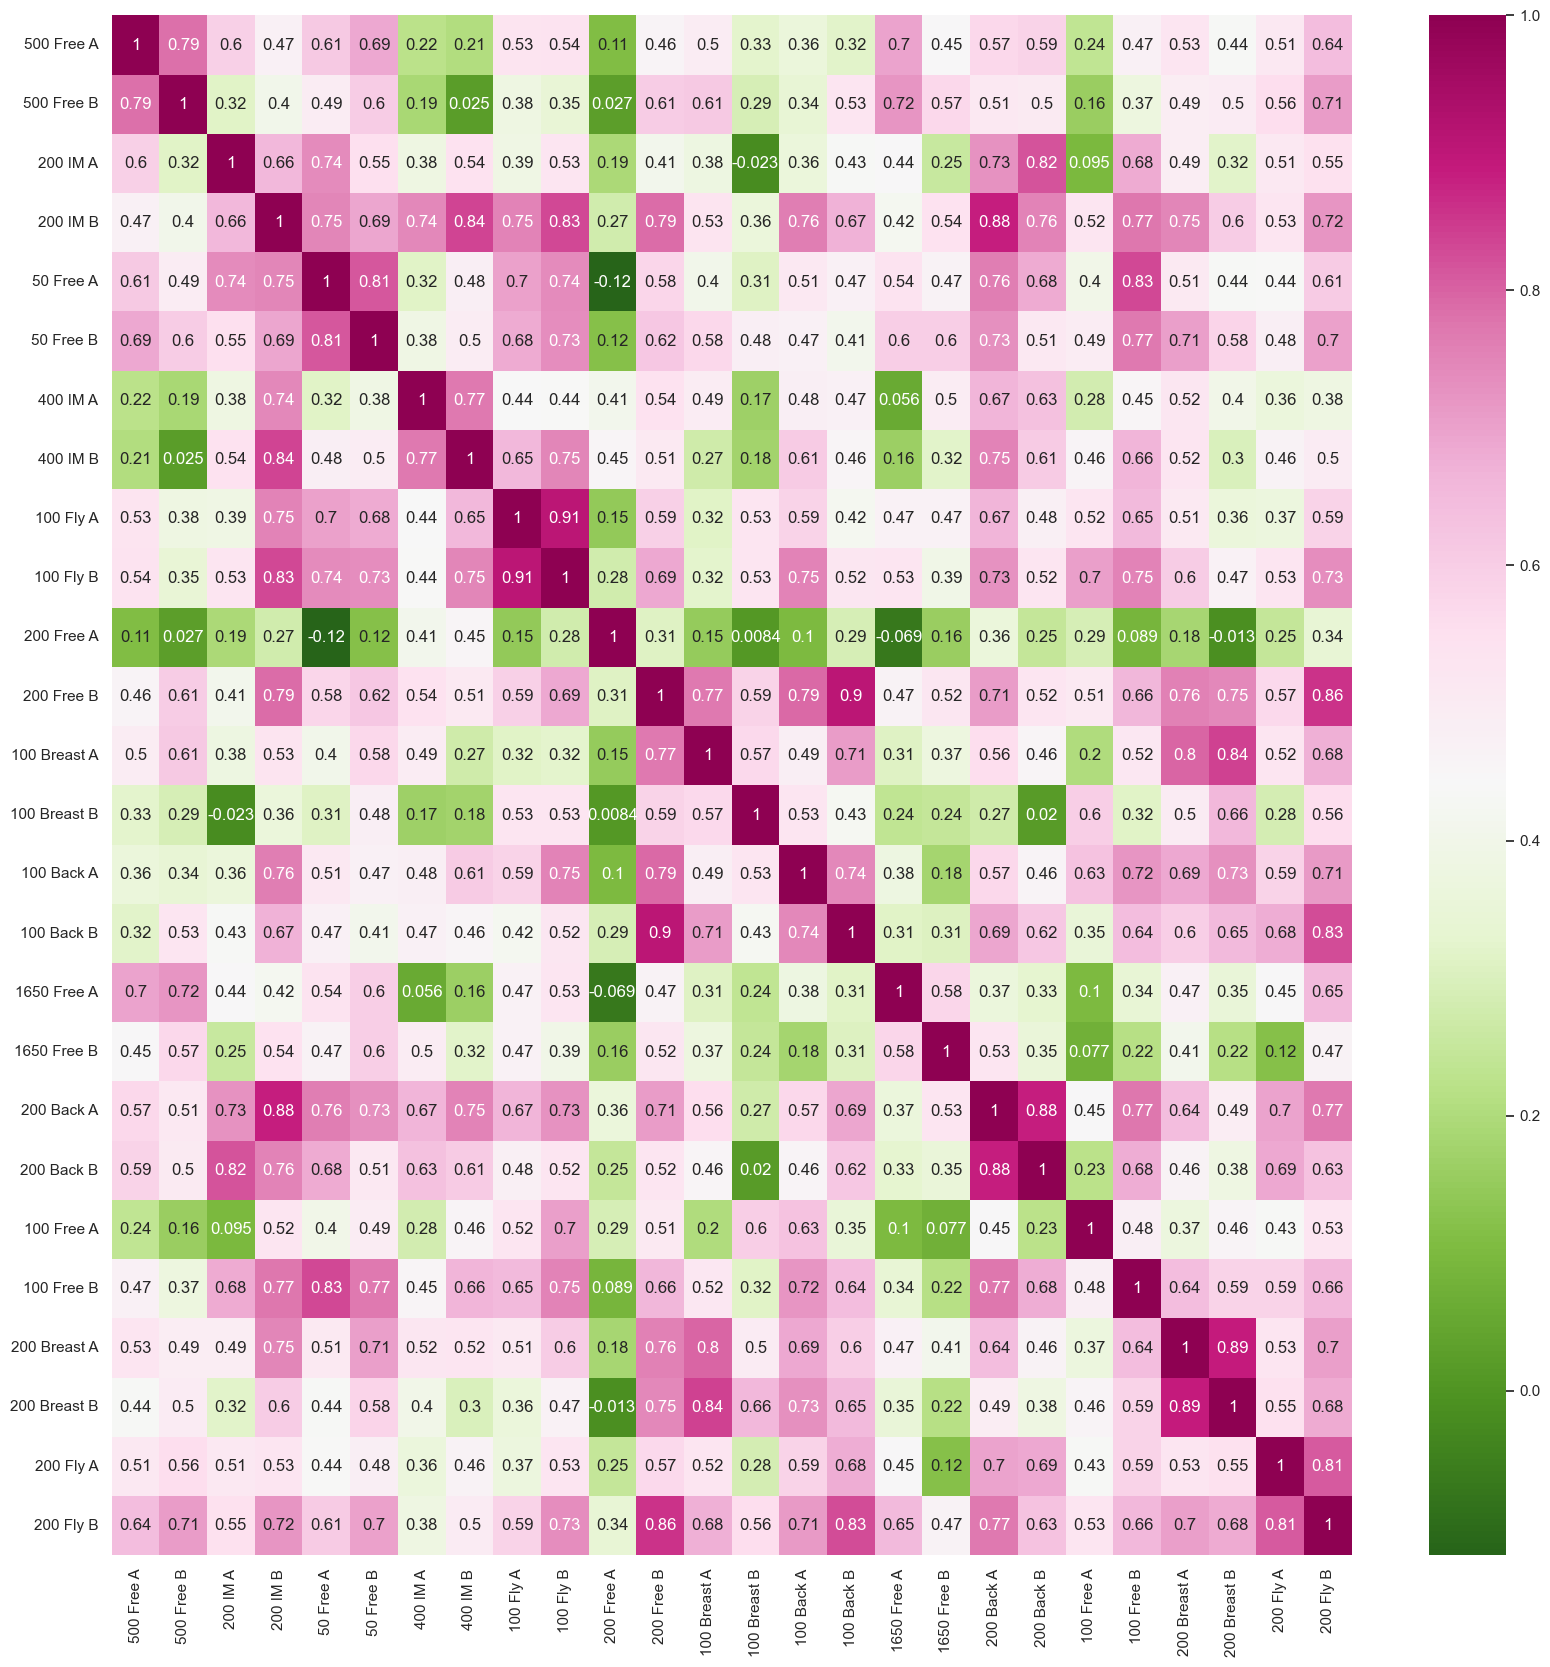

In [53]:
sb.set(rc = {'figure.figsize': (20,20)})
sb.heatmap(correlation_matrix, annot = True, cmap = "PiYG_r")

Lots to take in here, so let's just dive in one row at a time. I will share stuff that I expected, stuff that stands out to me, and other observations. Note that I'm sure tons of this correlation is just noise and there's no actual causation behind it. If nothing is written, nothing stands out at me too much.

500 Free A: Surprised at the high correlation to 50 free and low correlation to 400 IM and 200 free.

500 Free B: Surprised at high correlation to 100 breast and low correlation to 400 IM.

200 IM A: Surprised that correlation to 200 back is higher than correlation to either of the breaststrokes and even to its own B-final.

200 IM B: Surprised that correlation to its own A-final is much lower than many other correlations.

50 Free A: Shocked at such low correlation to 200 free A. Lowest correlation in the entire map.

50 Free B: Shocked at such low correlation to 200 free A.

400 IM A: Shocked at such low correlation to 500 free and 1650 free.

400 IM B: Shocked at such low correlation to 500 free and 1650 free.

100 Fly A: The .91 correlation to its other final looks like the strongest correlation in the map. Surprised that correlation to 100 back isn't higher.

100 Fly B: The .91 correlation to its other final looks like the strongest correlation in the map.

200 Free A: This particular event has like the lowest correlation with everything overall. And that isn't even the case at all for the 200 free B-final. Lowest correlation for any event pair with its other final.

200 Free B: Stuningly high correlation with 100 back B-final. Lowest correlation for any event pair with its other final.

100 Breast A: Surprised that the correlation with the B-final isn't higher.

100 Breast B: Surprised that the correlation with the A-final isn't higher.

100 Back A: Nothing really stands out here.

100 Back B: Stunningly high correaltion with 200 free B-final.

1650 Free A: Surprised at low correlation to 200 free A and both 400 IM.

1650 Free B: Surprised at low correlation to 200 free A.

200 Back A: Very strong correlation to the other final and the 200 IM B. Kind of funny given the below (A vs B).

200 Back B: Very strong correlation to the other final and the 200 IM A. Kind of funny given the above (B vs A).

100 Free A: Surprised at low correlation to 500 free.

100 Free B: Surprised at low correlation to 200 free A.

200 Breast A: Very strong correlation to its other final.

200 Breast B: Very strong correlation to its other final.

200 Fly A: Nothing really stands out here.

200 Fly B: Suprrised at such strong correlation to 200 free B and 100 back B.

## Moving Averages

I'm not quite sure how to calculate the optimal weights for rolling moving averages yet. For now, I will just calculate simple moving averages and exponentially weighted moving averages. I will use 4 data points as that's how many there are in one Olympic cycle. Note also that I will be using this on the improvements rather than on the actual times because the actual times should, over time, get faster whereas the improvements are much more likely to not have a "moving mean".

In [54]:
#Simple Moving Average
moving_simple_average = percent_improvements_raw.copy()
moving_simple_average = moving_simple_average.rolling(4, axis = 1).mean()
moving_simple_average.drop(columns = ["2006", "2007", "2008"], inplace = True)
columns1 = list(swim_data_describers.columns.values)
columns2 = list(moving_simple_average.columns.values)
moving_simple_average
moving_simple_average_with_describers = pd.concat([swim_data_describers,moving_simple_average], axis = 1)
moving_simple_average_with_describers

,Event,Stroke,Distance,A or B Final,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,A 500 FR,FR,500,A,-0.002853,-0.000029,0.000428,0.000031,0.001485,-0.003137,-0.003851,-0.002255,-0.003909,-0.001166,0.000078,-0.000903,0.000192,-0.001581,-0.001884
1,B 500 FR,FR,500,B,-0.002556,-0.001318,-0.000840,-0.002123,0.000341,-0.002741,-0.003208,-0.000640,-0.003239,-0.001732,-0.001746,-0.002435,0.000012,-0.001149,-0.000866
2,A 200 IM,IM,200,A,-0.005722,-0.004105,-0.001693,-0.003036,-0.000017,-0.003759,-0.004402,-0.003791,-0.003161,-0.000267,-0.000438,0.000208,-0.000073,-0.002984,-0.001791
3,B 200 IM,IM,200,B,-0.005535,-0.004198,-0.003662,-0.002211,-0.000107,-0.002601,-0.002290,-0.003485,-0.002211,-0.001667,-0.001521,-0.001303,-0.000459,-0.001503,-0.001746
4,A 50 FR,FR,50,A,-0.004611,-0.000815,-0.000044,-0.000947,0.004956,-0.003333,-0.000980,-0.002922,-0.005259,-0.000899,-0.002992,-0.000908,0.001441,-0.001296,-0.002351
5,B 50 FR,FR,50,B,-0.004584,0.000176,0.000048,0.000176,0.003618,-0.002674,-0.002933,-0.001773,-0.004467,-0.002830,-0.002444,-0.002367,0.001431,-0.000498,-0.002063
6,A 400 IM,IM,400,A,-0.005538,-0.004282,-0.001573,-0.001128,-0.001142,-0.001050,-0.003323,-0.004319,-0.002004,-0.003756,-0.001166,-0.000703,0.000189,0.000122,-0.001917
7,B 400 IM,IM,400,B,-0.005409,-0.003667,-0.003382,-0.001027,-0.000472,-0.002088,-0.002636,-0.005583,-0.002253,-0.003801,-0.001540,0.000249,0.000472,-0.000673,-0.001213
8,A 100 FL,FL,100,A,-0.007351,-0.002088,-0.003174,0.000123,0.002605,-0.002471,-0.000422,-0.003740,-0.003756,-0.003445,-0.003335,-0.002499,-0.002039,-0.002823,-0.003660
9,B 100 FL,FL,100,B,-0.005839,-0.002624,-0.003485,0.000042,0.001854,-0.002446,-0.001057,-0.004070,-0.004469,-0.003415,-0.003689,-0.002825,-0.001255,-0.002958,-0.002186


In [55]:
#Exponentially-weighted moving average
moving_exp_average = percent_improvements_raw.copy()
moving_exp_average = moving_exp_average.ewm(4, axis = 1).mean()
moving_exp_average.drop(columns = ["2006", "2007", "2008"], inplace = True)
columns1 = list(swim_data_describers.columns.values)
columns2 = list(moving_exp_average.columns.values)
moving_exp_average
moving_exp_average_with_describers = pd.concat([swim_data_describers,moving_exp_average], axis = 1)
moving_exp_average_with_describers

,Event,Stroke,Distance,A or B Final,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,A 500 FR,FR,500,A,-0.003382,0.000673,0.000828,-0.000679,-0.000619,-0.002379,-0.002207,-0.001448,-0.002651,-0.001511,-0.000492,-0.000941,-0.001296,-0.001923,-0.001094
1,B 500 FR,FR,500,B,-0.003812,0.000238,0.000153,-0.001972,-0.001526,-0.001757,-0.001800,-0.000962,-0.003013,-0.001634,-0.001711,-0.001507,-0.001347,-0.001305,-0.001215
2,A 200 IM,IM,200,A,-0.006449,-0.003842,-0.001573,-0.002510,-0.002301,-0.004691,-0.003202,-0.003121,-0.002261,-0.002011,-0.001324,-0.001100,-0.000924,-0.003337,-0.001426
3,B 200 IM,IM,200,B,-0.006853,-0.003503,-0.002838,-0.001031,-0.002727,-0.003383,-0.002581,-0.002122,-0.002309,-0.002537,-0.001844,-0.001381,-0.001017,-0.002356,-0.001916
4,A 50 FR,FR,50,A,-0.006143,0.000047,-0.000105,0.000575,0.001180,-0.003364,-0.000617,-0.001617,-0.002613,-0.002282,-0.001695,-0.000691,0.000098,-0.002377,-0.002646
5,B 50 FR,FR,50,B,-0.005421,0.000496,0.000223,0.000167,0.000249,-0.002280,-0.002115,-0.000637,-0.002705,-0.003011,-0.002381,-0.000862,0.000329,-0.002165,-0.003000
6,A 400 IM,IM,400,A,-0.006183,-0.003878,-0.001615,-0.000655,-0.003570,-0.002298,-0.002819,-0.002597,-0.002796,-0.003278,-0.001392,-0.001094,-0.000859,-0.001777,-0.001907
7,B 400 IM,IM,400,B,-0.006324,-0.003232,-0.002929,-0.000289,-0.002946,-0.002818,-0.003152,-0.003400,-0.002246,-0.003588,-0.001846,-0.000868,-0.000100,-0.002774,-0.001684
8,A 100 FL,FL,100,A,-0.008130,-0.001219,-0.003109,-0.000397,-0.001287,-0.002190,-0.001700,-0.002567,-0.002909,-0.003131,-0.002384,-0.002370,-0.002360,-0.003329,-0.003242
9,B 100 FL,FL,100,B,-0.006662,-0.001921,-0.002964,-0.000038,-0.001156,-0.002719,-0.002158,-0.002442,-0.003267,-0.003360,-0.002931,-0.002324,-0.001846,-0.003620,-0.002522
